# Homework 20: Unsupervised Machine Learning

## Step 1: Prepare the Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

###  Step 1: Load the MyOpia dataset

In [2]:
# Loading the preprocessed MyOpia CSV file
file_path = Path("Resource/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Column names
df_myopia.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [4]:
# There were 81 myopica (1) children samples and 537 (0) non-myopic children samples

df_myopia["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [35]:
df_myopia.shape

(618, 15)

#### Preprocess the data

In [5]:
# Split the DataFrame into data and target

y = df_myopia["MYOPIC"].values
X = df_myopia.drop("MYOPIC", axis=1)

In [6]:
# Split the data into two groups, the training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Create a scaler to standardize the data, this is the default scaler to use.

scaler = StandardScaler()

In [8]:
# Fit the X_train data to the standard scaler

scaler.fit(X_train)

StandardScaler()

In [9]:
# Transform X_train and X_test data
# Note that the scaler used to transform X_train and X_test was trained on X_train set

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Create predictions with KNN

In [10]:
# Instantiate KNN model and make predictions, KNN use odd values only, not even values.

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [11]:
# Access the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8709677419354839

## Step 2: Perform Dimensionality Reduction with PCA
One good thing about using dimensionality reduction is it's techniques in which it can help to speed up machine learning by reducing the size of large datasets, while preserving most of the useful information that needed to better fit a predictive model.

Principal Component Analysis (PCA) happens to be one of the dimensionality reduction techniques that I will use for this dataset.

In [12]:
# Dependencies
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [13]:
# Do this on Windows machine before importing Kmeans to avoid a known bug (memory leak).
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [14]:
# Initialize PCA model

pca = PCA(n_components=2)

# Get two principa components for the data
myopia = pca.fit_transform(df_myopia)

In [15]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia, columns=["principal component 1", "principal component 2"]
)
df_myopia_pca.head()

,principal component 1,principal component 2
0,12.138571,31.631724
1,-15.268436,-6.095055
2,-11.662322,3.755654
3,11.236421,4.008376
4,-22.446587,4.581399


In [16]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.7253546 , 0.16076957])

### Sample Analysis
According to the explained variance, the first principal component contains approximately 73% of the variance and the second principal component contains 16% of the variance. We have approximately 89% of the information in the original dataset, and we will see whether increasing the number of principal components to 3 will increase the explained variance.

In [17]:
# Initialize PCA model for 3 principal components
pca = PCA(n_components=3)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(df_myopia)

In [18]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca,
    columns=["principal component 1", "principal component 2", "principal component 3"],
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3
0,12.138571,31.631724,-4.527171
1,-15.268436,-6.095055,1.207157
2,-11.662322,3.755654,2.808256
3,11.236421,4.008376,-8.179998
4,-22.446587,4.581399,-1.817465


In [19]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.7253546 , 0.16076957, 0.07225044])

### Sample Analysis
The first principal component has 73%, the second principal component has 16%, and the third principal component has 1%, an overall total of 90% for the increased variance. 

In [21]:
# Create a new dataframe for t-SNE
df2 = df_myopia.drop(['MYOPIC'], axis=1)
labels = df_myopia['MYOPIC']

In [22]:
from sklearn.manifold import TSNE
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [23]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df2)

C:\Users\maimy\.conda\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [24]:
# The dataset has dropped from 15 columns to 2 columns
tsne_features.shape

(618, 2)

In [25]:
# Prepare to plot the dataset

# The first column of transformed features
df2['x'] = tsne_features[:,0]

# The second column of transformed features
df2['y'] = tsne_features[:,1]

## Figure 0. Scatter Plot t-SNE

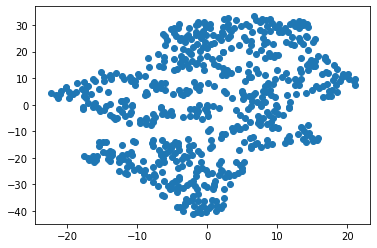

In [26]:
# Visualize the clusters

plt.scatter(df2["x"], df2["y"])
plt.show()

In [36]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

### Figure 1. Color clusters for t-SNE

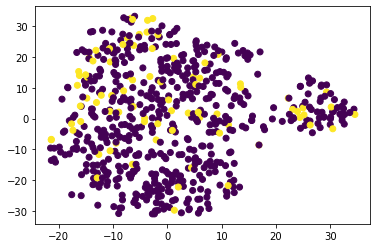

In [37]:
# Visualize the clusters with color
plt.scatter(df2['x'], df2['y'], c=labels)
plt.show()

### Are There Distinct Clusters on the Scatter Plots?
When the color is added to the scatter plot you cannot tell the distinct clusters on the scatter plot. Both colors are just everywhere on the scatter plot.

## Step 3: Perform a Cluster Analysis with K-means

In [38]:
# Initialize the K-means with K = 3
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=5)

In [39]:
# Fit the model
model.fit(df_myopia_pca)

KMeans(n_clusters=3, random_state=5)

In [40]:
# Get predictions
predictions = model.predict(df_myopia_pca)
print(predictions)

[2 1 1 2 1 2 2 1 1 2 0 1 1 1 2 1 1 2 2 1 2 1 1 2 2 2 1 1 1 1 2 2 2 2 2 2 2
 1 1 1 1 1 0 2 2 1 0 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 0 2 1 1 2 1 0 1 0 2
 1 2 1 0 2 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 0 2 1 2 2 2 1 2 2 0 2 1 2 1 1 0
 1 1 1 1 1 2 1 1 2 1 2 1 1 0 2 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2
 1 0 1 1 0 1 2 1 1 2 1 1 1 1 2 1 1 1 2 2 0 1 1 2 0 1 1 1 1 1 2 1 2 0 1 1 1
 2 1 1 1 2 1 2 1 1 1 2 1 2 1 2 1 1 2 2 2 1 2 1 1 2 0 1 2 2 1 2 0 1 1 2 1 2
 0 1 1 0 0 1 2 1 2 2 2 2 1 1 1 2 1 1 2 2 1 2 1 1 1 1 0 1 2 2 1 2 1 1 1 1 2
 1 2 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 0 2 1 0 2 0 1 1 1 2 1 2 1 1 2 1 0 1
 1 1 2 1 1 1 2 2 1 1 2 1 2 2 2 1 2 1 1 2 1 1 1 2 2 2 2 2 1 2 1 2 1 2 1 1 1
 1 1 1 1 1 2 2 2 2 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 2 2 1 1 2 2 1 1 2 2 1 2
 2 2 1 2 0 2 2 2 2 2 0 1 1 1 1 2 1 2 2 2 1 0 1 1 1 2 1 2 1 1 1 1 2 0 2 2 2
 0 2 2 1 2 2 2 1 2 1 1 1 1 2 2 1 1 0 1 1 2 2 2 0 1 1 1 1 2 1 0 2 0 1 1 2 2
 2 1 1 2 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 1 0 1 1 2 1 2 1 2 1 1 0 1 1 1 1 2 1
 1 1 0 1 1 1 2 1 0 2 1 1 

In [41]:
# Add a new class column to df_myopia
df_myopia["class"] = model.labels_
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1,2
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0,1
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1,2
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0,1


In [42]:
new_df = df_myopia.copy()
new_df['cluster'] = predictions

In [43]:
new_df.head(20)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,class,cluster
0,6,-0.052,21.889999,3.690,3.498,14.700000,45,8,0,0,10,34,1,1,1,2,2
1,6,0.608,22.379999,3.702,3.392,15.290000,4,0,1,1,7,12,1,1,0,1,1
2,6,1.179,22.490000,3.462,3.514,15.520000,14,0,2,0,10,14,0,0,0,1,1
3,6,0.525,22.200001,3.862,3.612,14.730000,18,11,0,0,4,37,0,1,1,2,2
4,5,0.697,23.290001,3.676,3.454,16.160000,14,0,0,0,4,4,1,0,0,1,1
5,6,1.744,22.139999,3.224,3.556,15.360000,10,6,2,1,19,44,0,1,0,2,2
6,6,0.683,22.330000,3.186,3.654,15.490000,12,7,2,1,8,36,0,1,0,2,2
7,6,1.272,22.389999,3.732,3.584,15.080000,12,0,0,0,8,8,0,0,0,1,1
8,7,1.396,22.620001,3.464,3.408,15.740000,4,0,3,1,3,12,0,0,0,1,1
9,6,0.972,22.740000,3.504,3.696,15.540000,30,5,1,0,10,27,0,0,0,2,2


In [44]:
# Initialize the K-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_myopia_pca)

# Predict clusters
predictions = model.predict(df_myopia_pca)

# Add the predicted class columns
# df_myopia_pca["class"] = model.labels_
# df_myopia_pca.head(50)

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt


In [46]:
# Generate 3 clusters of random data
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples=300, centers=3,
                    cluster_std=0.60, random_state=0)

## Figure 2. Scatter Plot

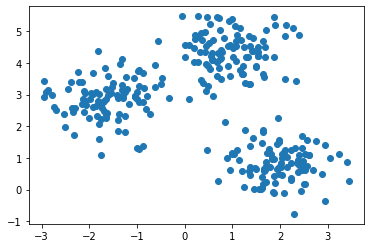

In [47]:
# Plot the data
plt.scatter(data[:, 0], data[:, 1])

In [48]:
# Use n_clusters=4 as te k value
# We can see from the plot above that there are 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(data)

KMeans(n_clusters=4)

In [49]:
# Predict the clusters
predicted_clusters = kmeans.predict(data)

## Figure 3. Scatter Plot

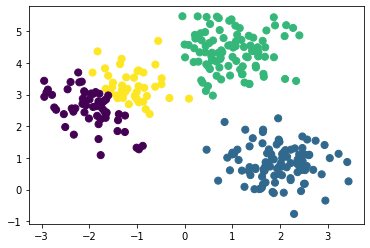

In [50]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.

plt.scatter(data[:, 0], data[:, 1], c=predicted_clusters, s=50, cmap='viridis')

## Figure 4. Line Plot

C:\Users\maimy\.conda\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


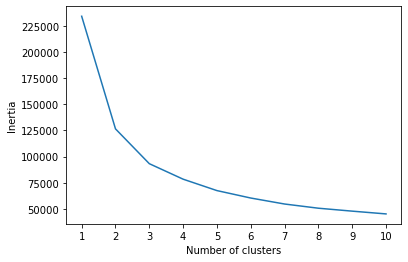

In [51]:


inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Step 4: Make a Recommendation
When we start at 1 cluster on x-axis, the inertia is at it's highest point. When we increased the k to 2 clusters the inertia decreased tremendously going downwards. But when we add the 3 clusters, the inertia remained to be a small drop and it gradually moved downwards on the increased k number of clusters.

Therefore, I would say that the elbow of the curve marks the most difference is at the point of k-3 because anything else larger than k-3 shows a minimal change in the decreased of inertia, or the error of the model. 

Based on the findings, my recommendation is that these patients could be clustered into four groups. Because of the similarities in the different deminsions of because of the large dataset, K-means will assign the k-groups to each of the four clusters based on the distance from each group's centroid, or most clustered.